<H1>Effect of the Brigthness of the Moon in the Duration of Trips of Citibike in New York City during Summer</H1>

<strong><h2>Introduction</h2></strong>

It has been told that the Moon affects the behavior of animals and people, but nobody have ever asked if it affects the behavior of cyclist in New York City. This research studies if the Moon has some effects in the behavior of the user of the New York City rental program Citibike.

<strong><H2>Hyphotesis</H2></strong>

<strong>Null Hyphothesis:</strong>  The Moon in Summer doesn't have signifcant effect in the night time Citbike durations of trips.

<strong>Alternative Hyphotesis:</strong> The Moon in Summer have significant effect in the night time Citibike durations of trips.

<H2>Research Design</H2>
<ol>
<li>Coverage Area:</li>  The sample was taken from all boroughs where Citbike operated during summer. 
<li>Sample Techniques</li>  For the purpose of this project only ridership at night was analysis for the month July and August from the 2013 and 2014. 
<li>Metadata</li>The moon information was collected from <ul> <li>"Moon phases for New York, New York, U.S.A", accessed October 1, 2015. http://www.timeanddate.com/moon/phases/usa/new-york?year=2015</li> <li>"Fraction of the Moon Illumantion",last modified 18 may 2015. http://aa.usno.navy.mil/data/docs/MoonFraction.php</li>
<li>"Data of sunrise and sunset for defining the nights in the period"accessed October 1, 2014. http://www.timeanddate.com/sun/usa/new-york?month=8&year=2015 </li>


<H2>Statistic Analysis</H2>
<ol>
<li>Confidence Leve:</li>  The confidence was 5%.
<li>Statistic Test:</li>  The project used T-test and the p value as the determinant factor if there is correlation between Moon cycles and number riderships of Citibike.
<li>Factors to be Analized</li>  Total Numbers of riderships during night time.

In [1]:
#Import of libraries
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Import of Data to Python
bike=pd.read_csv('moondata.csv', header=0)

In [6]:
#Verification of the transfer data
print bike.head()

         Date  Quantity  Durations  MoonIllumination
0  2014-07-01      5488    4551658              0.13
1  2014-07-02      2261    1649657              0.20
2  2014-07-03      1839    1382932              0.29
3  2014-07-04      3995    4307680              0.38
4  2014-07-05      4269    4152536              0.47


In [7]:
#Summary of Data:
bike.describe()

,Quantity,Durations,MoonIllumination
count,62.000000,62.000000,62.000000
mean,4550.290323,3856161.838710,0.455000
std,968.128182,895272.684369,0.348734
min,994.000000,644861.000000,0.000000
25%,4330.000000,3683281.500000,0.130000
50%,4777.500000,4150869.500000,0.400000
75%,5114.250000,4364377.250000,0.792500
max,6046.000000,4956646.000000,1.000000


In [8]:
#Creation of a X value to be analyzed
x = bike['MoonIllumination']
print x

0     0.13
1     0.20
2     0.29
3     0.38
4     0.47
5     0.57
6     0.67
7     0.77
8     0.85
9     0.93
10    0.97
11    1.00
12    0.99
13    0.95
14    0.89
15    0.80
16    0.70
17    0.60
18    0.49
19    0.38
20    0.29
21    0.20
22    0.13
23    0.07
24    0.03
25    0.01
26    0.00
27    0.02
28    0.05
29    0.09
      ... 
32    0.32
33    0.42
34    0.52
35    0.62
36    0.73
37    0.82
38    0.90
39    0.96
40    0.99
41    1.00
42    0.97
43    0.91
44    0.83
45    0.74
46    0.64
47    0.53
48    0.43
49    0.33
50    0.24
51    0.17
52    0.10
53    0.05
54    0.02
55    0.00
56    0.00
57    0.02
58    0.06
59    0.12
60    0.19
61    0.27
Name: MoonIllumination, dtype: float64


In [9]:
#Creation of a y value to be analyzed
y = bike['Durations']
print y

0     4551658
1     1649657
2     1382932
3     4307680
4     4152536
5     4163327
6     4294195
7     3744139
8     4324833
9     4734605
10    4209280
11    4680330
12    4045826
13     644861
14    1292603
15    4856234
16    4956646
17    4333493
18    4926658
19    4742763
20    4382822
21    4611437
22    2765983
23    4548881
24    4179892
25    4608894
26    4374672
27    3753055
28    4113595
29    4539120
       ...   
32    3942108
33    3794319
34    3836116
35    4292641
36    4524629
37    4466025
38    4165526
39    4599463
40    4206581
41    3829094
42    2032324
43    3588576
44    4169877
45    3393554
46    4275772
47    4149203
48    3899980
49    4060168
50    4331151
51    3443501
52    3006995
53    3614499
54    3650148
55    3689340
56    3930466
57    3681262
58    3751464
59    3029561
60    3144684
61    2730123
Name: Durations, dtype: int64


In [10]:
#To obtain slope and intercept
X=np.matrix(pd.DataFrame({'intercept':[1]*len(x),'x1':x}))
Y=np.matrix(y).transpose()
w=pow((X.transpose()*X),-1)*X.transpose()*Y
print(w)

[[ 3838653.72844554]
 [   38479.36321788]]


                            OLS Regression Results                            
Dep. Variable:              Durations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.01348
Date:                Sun, 04 Oct 2015   Prob (F-statistic):              0.908
Time:                        23:14:06   Log-Likelihood:                -937.17
No. Observations:                  62   AIC:                             1878.
Df Residuals:                      60   BIC:                             1883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         3.839e+06   1.89e+05  

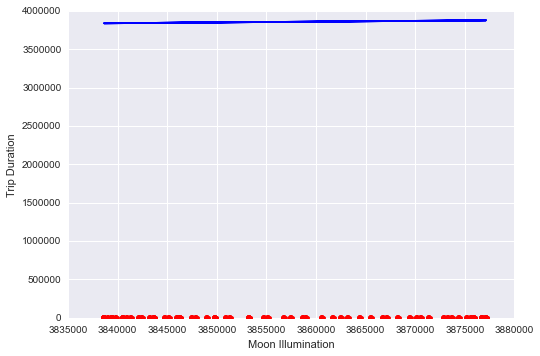

In [11]:
#To obtain regression, anlysis of the regression and ploting of graph:
lm = smf.ols(formula='Durations ~ MoonIllumination', data = bike).fit()
print(lm.summary())
lmy = lm.predict(bike)
xlabel('Moon Illumination')
ylabel('Trip Duration')
plt.plot(lmy,x,'or')
plt.plot(lmy,lmy,'-b')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Durations   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.01348
Date:                Sun, 04 Oct 2015   Prob (F-statistic):              0.908
Time:                        23:14:08   Log-Likelihood:                -937.17
No. Observations:                  62   AIC:                             1878.
Df Residuals:                      60   BIC:                             1883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         3.839e+06   1.89e+05     20.267      0.000      3.46e+06  4.22e+06
MoonIllumination  3.848e+04   3.31e+05      0.116      0.908     -6.24e+05  7.01e+05
==============================================================================
Omnibus:                       31.721   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.752
Skew:                          -1.789   Prob(JB):                     1.75e-13
Kurtosis:                       6.153   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

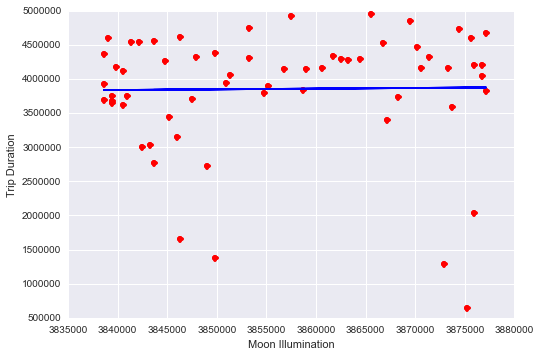

In [12]:
#Normalization of the data
x1=(x-mean(x))/std(x)
lm = smf.ols(formula='Durations ~ MoonIllumination', data = bike).fit()
lmy = lm.predict(bike)
xlabel('Moon Illumination')
ylabel('Trip Duration')
plt.plot(lmy,y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()

<strong><H2>Conclusion</H2></strong>

After the analysis of the data it is clear that the Moon Illumination doesn’t have a significant effect in trip durations